In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np
import h5py
import pandas as pd

In [2]:
f = h5py.File("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/generic_rate_yield_trade_off.jld", "r")
yield45 = f["yield_45"].value
rate45 = f["rate_45"].value
power45 = rate45*4.2

In [30]:
fig_width = 3.0                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 2.8# height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 9,
          'axes.titlesize': 10,
          'legend.fontsize': 9,
          'xtick.labelsize': 9,
          'ytick.labelsize': 9,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

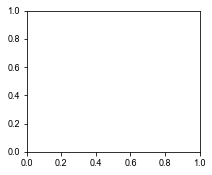

In [31]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

/Users/glmarschmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


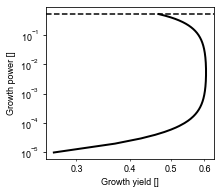

In [42]:
plt.plot(yield45, rate45, '-', lw=2, color="k")
plt.axhline(y=max(rate45), linestyle='--',color="k")
#plt.axvline(x=max(yield45), linestyle='--',color="k")
plt.xscale('log',basex=10) 
plt.yscale('log',basey=10) 
#plt.xlabel(r"$\textnormal{Growth yield}\,\, [\,\textnormal{-}\,]$")
#plt.ylabel(r"$\textnormal{Growth power}\, \mathrm{[\Delta G\, C\textnormal{-} mol^{-1}h^{-1}]}$")
ax = plt.axes()  
plt.xlabel("Growth yield []")
plt.ylabel("Growth power []")
#ax.set_xlim([0.25, 0.62])
#ax.set_ylim([5e-6, 1e0])
from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.xaxis.set_minor_formatter(StrMethodFormatter('{x:.1f}'))
ax.yaxis.set_tick_params(which='minor', bottom=False)
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/generic_power_yield.svg", format='svg')

In [43]:
df_fcr = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_fcr.csv")
#
df_fcr_p = df_fcr.loc[(df_fcr.response == "positive")]
df_fcr_n = df_fcr.loc[(df_fcr.response == "negative")]
df_fcr_u = df_fcr.loc[(df_fcr.response == "undefined")]

In [46]:
fig_width = 1.8                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 2.14      # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 9,
          'axes.titlesize': 10,
          'legend.fontsize': 9,
          'xtick.labelsize': 9,
          'ytick.labelsize': 9,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial'}

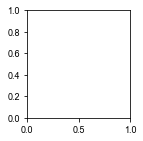

In [47]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

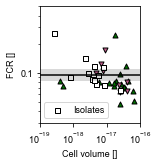

In [48]:
plt.scatter(df_fcr_p.Vcell, df_fcr_p.FCR,  s=25, color='#007100', edgecolor='k', marker='^', label="")
plt.scatter(df_fcr_n.Vcell, df_fcr_n.FCR,  s=25, color='#bd5e8b', edgecolor='k', marker='v', label="")
plt.scatter(df_fcr_u.Vcell, df_fcr_u.FCR,  s=25, color='w', edgecolor='k', marker='s', label="Isolates")
ax = plt.gca()
ax = sns.regplot(x="Vcell", y="FCR", data=df_fcr, marker="", line_kws={"color":"k","alpha":1.0,"lw":1.5}, truncate=False)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1e-19, 1e-16])
ax.set_ylim([3e-2, 5e-1])
ax.set_xticks([1e-19, 1e-18, 1e-17, 1e-16])
ax.set_yticks([1e-1])
ax.set_yticklabels(["0.1"])
plt.legend(loc="lower left")
ax.set(xlabel="Cell volume []", ylabel="FCR []")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/isolates_fcr.svg", format='svg')

In [72]:
df_bge = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_BGE.csv")
df_bge = df_bge.dropna()
#
df_bge_p_sugars = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Sugars")]
df_bge_p_organics = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Organic acids")]
df_bge_p_aminos = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Amino acids")]
df_bge_p_fattys = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Fatty acids")]
df_bge_p_nucleos = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Nucleotides")]
df_bge_p_auxins = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Auxins")]
df_bge_n_sugars = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Sugars")]
df_bge_n_organics = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Organic acids")]
df_bge_n_aminos = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Amino acids")]
df_bge_n_fattys = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Fatty acids")]
df_bge_n_nucleos = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Nucleotides")]
df_bge_n_auxins = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Auxins")]
df_bge_u_sugars = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Sugars")]
df_bge_u_organics = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Organic acids")]
df_bge_u_aminos = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Amino acids")]
df_bge_u_fattys = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Fatty acids")]
df_bge_u_nucleos = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Nucleotides")]
df_bge_u_auxins = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Auxins")]
#
bge_grouped = df_bge.groupby(["response", "ontology"]).median()
df_bge_high = bge_grouped[bge_grouped.rgrowth >  0.041]
df_bge_low = bge_grouped[bge_grouped.rgrowth <  0.0407]

In [74]:
fig_width = 3.14                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = fig_width*golden_mean      # height in inches
dpi = 300.0  
# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 8,
          'axes.titlesize': 10,
          'legend.fontsize': 6,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size}

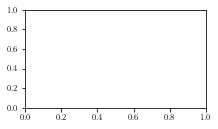

In [75]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

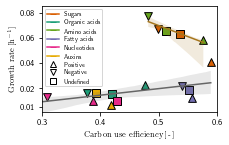

In [82]:
plt.scatter(np.median(df_bge_p_sugars.BGE), np.median(df_bge_p_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_organics.BGE), np.median(df_bge_p_organics.rgrowth), s=60, c='#1b9e77', edgecolor='k',marker='^', label="")
plt.scatter(np.median(df_bge_p_aminos.BGE), np.median(df_bge_p_aminos.rgrowth), s=60, c='#66a61e',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_p_fattys.BGE), np.median(df_bge_p_fattys.rgrowth), s=60, c='#7570b3',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_p_nucleos.BGE), np.median(df_bge_p_nucleos.rgrowth), s=60, c='#e7298a',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_p_auxins.BGE), np.median(df_bge_p_auxins.rgrowth), s=60, c='#e6ab02',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_n_sugars.BGE), np.median(df_bge_n_sugars.rgrowth), s=60, c='#d95f02',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_organics.BGE), np.median(df_bge_n_organics.rgrowth), s=60, c='#1b9e77',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_aminos.BGE), np.median(df_bge_n_aminos.rgrowth), s=60, c='#66a61e',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_fattys.BGE), np.median(df_bge_n_fattys.rgrowth), s=60, c='#7570b3',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_nucleos.BGE), np.median(df_bge_n_nucleos.rgrowth), s=60, c='#e7298a',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_auxins.BGE), np.median(df_bge_n_auxins.rgrowth), s=60, c='#e6ab02',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_u_sugars.BGE), np.median(df_bge_u_sugars.rgrowth), s=60, c='#d95f02',edgecolor='k', marker='s', label="Sugars")
plt.scatter(np.median(df_bge_u_organics.BGE), np.median(df_bge_u_organics.rgrowth), s=60, c='#1b9e77',edgecolor='k', marker='s', label="Organic acids")
plt.scatter(np.median(df_bge_u_aminos.BGE), np.median(df_bge_u_aminos.rgrowth), s=60, c='#66a61e',edgecolor='k', marker='s', label="Amino acids")
plt.scatter(np.median(df_bge_u_fattys.BGE), np.median(df_bge_u_fattys.rgrowth), s=60, c='#7570b3',edgecolor='k', marker='s', label="Fatty acids")
plt.scatter(np.median(df_bge_u_nucleos.BGE), np.median(df_bge_u_nucleos.rgrowth), s=60, c='#e7298a',edgecolor='k', marker='s', label="Nucleotides")
plt.scatter(np.median(df_bge_u_auxins.BGE), np.median(df_bge_u_auxins.rgrowth), s=60, c='#e6ab02',edgecolor='k', marker='s', label="Auxins")
plt.legend()

#
ax = plt.gca()
ax = sns.regplot(x="BGE", y="rgrowth", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
ax = sns.regplot(x="BGE", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5})
ax.set_xlim([0.3, 0.6])
ax.set_ylim([0.001, 0.085])
ax.set(ylabel=r'$\textnormal{Growth rate}\, [\mathrm{h^{-1}}]$', xlabel=r'$\textnormal{Carbon use efficiency}\, [\,\textnormal{-}\,]$')
ax.set_yticks([0.005, 0.02, 0.04, 0.06, 0.08])
ax.set_yticklabels(["0.01", "0.02", "0.04", "0.06", "0.08"])
ax.set_xticks([0.3, 0.4, 0.5, 0.6])
ax.set_xticklabels(["0.3", "0.4", "0.5", "0.6"])
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
                   Line2D([0], [0], marker='_', color='#d95f02', label='Sugars',
                          markerfacecolor='#d95f02', markersize=6),
                   Line2D([0], [0], marker='_', color='#1b9e77', label='Organic acids',
                          markerfacecolor='#1b9e77', markersize=6),
                   Line2D([0], [0], marker='_', color='#66a61e', label='Amino acids',
                          markerfacecolor='#66a61e', markersize=6),
                   Line2D([0], [0], marker='_', color='#7570b3', label='Fatty acids',
                          markerfacecolor='#7570b3', markersize=6),
                   Line2D([0], [0], marker='_', color='#e7298a', label='Nucleotides',
                          markerfacecolor='#e7298a', markersize=6),
                   Line2D([0], [0], marker='_', color='#e6ab02', label='Auxins',
                          markerfacecolor='#e6ab02', markersize=6),
                   Line2D([0], [0], marker='^', color='w', label='Positive',
                          markerfacecolor='none', mec='k', markersize=6),
                   Line2D([0], [0], marker='v', color='w', label='Negative',
                          markerfacecolor='none', mec='k', markersize=6),
                   Line2D([0], [0], marker='s', color='w', label='Undefined',
                          markerfacecolor='none', mec='k', markersize=6),
]
ax.legend(handles=legend_elements)
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/batch_rate_cue_1.svg", format='svg')

In [83]:
df_bge = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_BGE_new.csv")
df_bge = df_bge.dropna()
df_bge['BP'] = df_bge['BP'].apply(lambda x: x*1e9)
df_bge['BR'] = df_bge['BR'].apply(lambda x: x*1e9)
df_bge['BP'] = df_bge['BP'].apply(lambda x: np.log(x))
df_bge['BR'] = df_bge['BR'].apply(lambda x: np.log(x))
#
df_bge_high = df_bge[df_bge.rgrowth >  0.041]
df_bge_low = df_bge[df_bge.rgrowth <  0.0407]

In [97]:
df_bge

,BGE,BP,BR,rgrowth,renzyme,rdreserve,isolate,class,phylum,response,genomesize,monomer,ontology
0,0.591660,2.065432,1.085781,0.059213,0.000457,0.081456,Acidobacteriaceae bacterium URHE0068,Acidobacteria,Acidobacteria,positive,6679185,2-aminoisobutyric acid,Amino acids
1,0.380744,3.463407,2.824118,0.127318,0.000419,0.136902,Bacillus sp. URHB0009,Bacilli,Firmicutes,negative,5377210,2-aminoisobutyric acid,Amino acids
2,0.475350,2.747519,1.994283,0.097510,0.000225,0.100524,Blastococcus sp. URHD0036,Actinobacteria,Actinobacteria,undefined,5177578,2-aminoisobutyric acid,Amino acids
3,0.590325,2.007878,1.167279,0.057814,0.000085,0.071506,Bradyrhizobium sp. URHA0002,Alphaproteobacteria,Proteobacteria,positive,6972827,2-aminoisobutyric acid,Amino acids
4,0.590507,2.063482,1.209371,0.060674,0.000116,0.072229,Bradyrhizobium sp. URHA0013,Alphaproteobacteria,Proteobacteria,positive,7193102,2-aminoisobutyric acid,Amino acids
5,0.594059,2.242458,1.175757,0.068539,0.000116,0.078030,Bradyrhizobium sp. URHD0069,Alphaproteobacteria,Proteobacteria,positive,6793945,2-aminoisobutyric acid,Amino acids
6,0.441952,2.640955,2.422173,0.094282,0.000169,0.097704,Burkholderia sp. URHA0054,Betaproteobacteria,Proteobacteria,positive,7244804,2-aminoisobutyric acid,Amino acids
7,0.585579,2.003536,1.300741,0.058165,0.000421,0.046366,Caulobacter sp. URHA0033,Alphaproteobacteria,Proteobacteria,positive,5642219,2-aminoisobutyric acid,Amino acids
8,0.467225,2.510839,1.744679,0.077970,0.000420,0.076006,Cellulomonas sp. URHD0024,Actinobacteria,Actinobacteria,undefined,4210445,2-aminoisobutyric acid,Amino acids
9,0.523950,2.184294,1.303921,0.063132,0.000289,0.063697,Cellulomonas sp. URHE0023,Actinobacteria,Actinobacteria,undefined,4467545,2-aminoisobutyric acid,Amino acids


In [84]:
df_bge_high_p = df_bge_high.loc[(df_bge_high.response == "positive")]
df_bge_high_n = df_bge_high.loc[(df_bge_high.response == "negative")]
df_bge_high_u = df_bge_high.loc[(df_bge_high.response == "undefined")]
bge_high_grouped_p = df_bge_high_p.groupby(["isolate"]).median()
bge_high_grouped_n = df_bge_high_n.groupby(["isolate"]).median()
bge_high_grouped_u = df_bge_high_u.groupby(["isolate"]).median()
df_bge_low_p = df_bge_low.loc[(df_bge_low.response == "positive")]
df_bge_low_n = df_bge_low.loc[(df_bge_low.response == "negative")]
df_bge_low_u = df_bge_low.loc[(df_bge_low.response == "undefined")]
bge_low_grouped_p = df_bge_low_p.groupby(["isolate"]).median()
bge_low_grouped_n = df_bge_low_n.groupby(["isolate"]).median()
bge_low_grouped_u = df_bge_low_u.groupby(["isolate"]).median()

In [85]:
bge_high_iso = bge_high_grouped_p.append([bge_high_grouped_n, bge_high_grouped_u])
bge_low_iso = bge_low_grouped_p.append([bge_low_grouped_n, bge_low_grouped_u])

In [86]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format


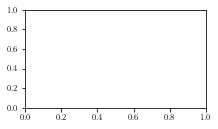

In [87]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

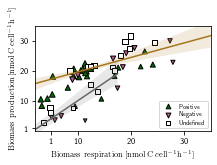

In [96]:
plt.scatter(bge_high_grouped_p.BR, bge_high_grouped_p.BP, s=bge_high_grouped_p.BGE*50, marker='^', color='#007100', edgecolor='k', label="")
plt.scatter(bge_high_grouped_n.BR, bge_high_grouped_n.BP, s=bge_high_grouped_n.BGE*50, marker='v', color='#bd5e8b', edgecolor='k', label="")
plt.scatter(bge_high_grouped_u.BR, bge_high_grouped_u.BP, s=bge_high_grouped_u.BGE*50, marker='s', color='w', edgecolor='k', label="")
plt.scatter(bge_low_grouped_p.BR, bge_low_grouped_p.BP, s=bge_low_grouped_p.BGE*50, marker='^', color='#007100', edgecolor='k', label="Positive")
plt.scatter(bge_low_grouped_n.BR, bge_low_grouped_n.BP, s=bge_low_grouped_n.BGE*50, marker='v', color='#bd5e8b', edgecolor='k', label="Negative")
plt.scatter(bge_low_grouped_u.BR, bge_low_grouped_u.BP, s=bge_low_grouped_u.BGE*50, marker='s', color='w', edgecolor='k', label="Undefined")
ax = plt.gca()
ax.set_xlim([0.2, 3.5])
ax.set_ylim([0.001, 3.5])
ax.set_yticks([0.1,1,2,3])
ax.set_yticklabels(["1","10", "20", "30"])
ax.set_xticks([0.5,1,2,3])
ax.set_xticklabels(["1","10", "20", "30"])
ax = sns.regplot(x="BR", y="BP", data=bge_high_iso, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5}, ci=95, truncate=False)
ax = sns.regplot(x="BR", y="BP", data=bge_low_iso, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5},ci=95, truncate=True)
ax.set(xlabel=r"$\textnormal{Biomass respiration}\, [\mathrm{nmol\, C\, cell^{-1}h^{-1}}]$", ylabel=r"$\textnormal{Biomass production}\, [\mathrm{nmol\, C\, cell^{-1}h^{-1}}]$")
plt.legend(loc="lower right")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/batch_resp_1.svg", format='svg')

In [92]:
np.lo

0.0

In [141]:
df_levin = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_bge_growth_levin.csv")
df_levin_p = df_levin.loc[(df_levin.response == "positive")]
df_levin_n = df_levin.loc[(df_levin.response == "negative")]
df_levin_u = df_levin.loc[(df_levin.response == "undefined")]

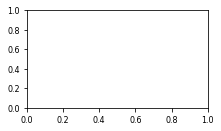

In [142]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

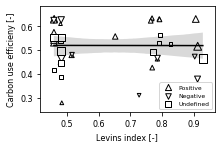

In [148]:
plt.scatter(df_levin_p.levins,df_levin_p.BGE_med, s=df_levin_p.rgrowth_med*800, marker='^', color='w', edgecolor='k', label="Positive")
plt.scatter(df_levin_n.levins, df_levin_n.BGE_med, s=df_levin_n.rgrowth_med*800, marker='v', color='w', edgecolor='k', label="Negative")
plt.scatter(df_levin_u.levins, df_levin_u.BGE_med, s=df_levin_u.rgrowth_med*800, marker='s', color='w', edgecolor='k', label="Undefined")
plt.legend()
ax = plt.gca()
ax = sns.regplot(x="levins", y="BGE_med", data=df_levin, marker="", line_kws={"color":"k","alpha":1.0,"lw":1.5})
ax.set(xlabel="Levins index [-]", ylabel="Carbon use efficieny [-]")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/batch_levins.svg", format='svg')

In [260]:
var = [6,5,4,3,2,1]
rel_inf = [39.47, 18.71, 14.93, 12.18, 10.33, 3.71]

In [261]:
fig_height = 3.14                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_wifth = fig_height*golden_mean      # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 8,
          'axes.titlesize': 10,
          'legend.fontsize': 6,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size}

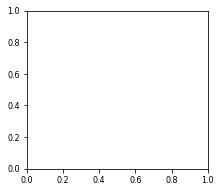

In [262]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

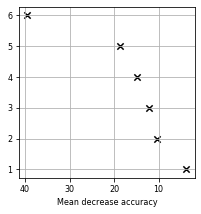

In [263]:
plt.scatter(x=rel_inf, y=var, s=40, marker='x', color='k', edgecolor='k')
plt.grid(True)
plt.ylabel("")
plt.xlabel("Mean decrease accuracy")
ax = plt.gca()
ax.invert_xaxis()
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/rf_batch_cue.svg", format='svg')

In [255]:
var = [6,5,4,3,2,1]
rel_inf = [45.34, 21.21, 16.43, 7.64, 5.34, 1.72]

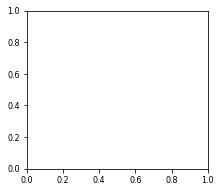

In [256]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

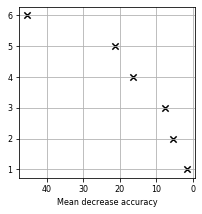

In [259]:
plt.scatter(x=rel_inf, y=var, s=40, marker='x', color='k', edgecolor='k')
plt.grid(True)
plt.ylabel("")
plt.xlabel("Mean decrease accuracy")
ax = plt.gca()
ax.invert_xaxis()
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/rf_batch_growth.svg", format='svg')

In [41]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/first_manuscript/files_pub/benchmark_protein_synthesis.csv")
df.head()

,V_P,V_R,gmax,V_cell,k_E,V_cell_model,V_P_model,V_R_model,tRNA_model,mRNA_model,V_mtR_model,k_E_model,diff
0,2.101147e-19,6.097366e-20,0.941429,2.752857e-18,3.244155,1.909016e-16,1.745318e-19,6.414248e-20,1.144949e-21,6.133402e-21,7.142083e-20,2.561630,-0.682525
1,3.240876e-19,8.603352e-20,0.677500,4.450000e-18,2.552137,3.977441e-16,2.442745e-19,6.905343e-20,1.601941e-21,8.581470e-21,7.923684e-20,2.396636,-0.155501
2,1.003650e-19,1.536313e-20,0.333500,1.950000e-18,2.178704,2.431404e-18,1.371041e-19,2.378735e-20,8.987359e-22,4.814456e-21,2.950054e-20,1.922207,-0.256497
3,6.861314e-20,1.284916e-20,0.545000,2.400000e-18,2.910241,3.761208e-20,1.585528e-19,3.812387e-20,1.039610e-21,5.569108e-21,4.473259e-20,2.266593,-0.643648
4,9.489051e-20,1.620112e-20,0.470000,2.300000e-18,2.752806,3.761208e-20,1.538989e-19,3.334090e-20,1.009001e-21,5.405136e-21,3.975503e-20,2.169482,-0.583324


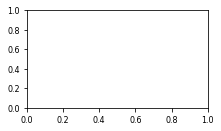

In [42]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

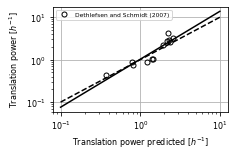

In [47]:
plt.plot(df["k_E_model"], df["k_E"], 'o', mfc='none', mec='k', ms=5, label="Dethlefsen and Schmidt (2007)")
x = np.linspace(1e-1,1e1,100)
y = x
y1 = np.exp(0.023)*x**1.13
plt.plot(x, y, '--', c='k', label="")
plt.plot(x, y1, '-', c='k', label="")
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r"Translation power $[h^{-1}]$")
plt.xlabel(r"Translation power predicted $[h^{-1}]$")
plt.legend()
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/first_manuscript/plots/benchmark_protein_synthesis.svg", format='svg')

In [7]:
from sympy import *

In [8]:
kE, yEV, y, kM, yEM = symbols('kE yEV y kM yEM', positive=True)

In [9]:
r_plus = -kE*(yEV*y-1) + 2*kE*kM*yEM*y/(kE*(yEV*y-1))

In [10]:
drdy = -kE*yEV*(y*yEV-1)**2-2*kM*yEM

In [11]:
ymax = (sqrt(2*kM*yEM/(kE*yEV))+1)*1/yEV

In [12]:
rmax = symbols('rmax', positive=True)

In [13]:
yrmax,b = solve(rmax + (-kE*(yEV*y-1) + 2*kE*kM*yEM*y/(kE*(yEV*y-1))) , y)

In [14]:
yrmax.subs([(kM, 0.001),(yEM,1), (kE, 0.1), (yEV, 1.01), (rmax, 0.3)])

0.983620594576853

In [15]:
expr = drdy.subs([(kM, 0.001),(yEM,1), (kE, 0.1), (yEV, 1.01)])

In [16]:
integrate(expr,(y,1.0,0.6) )

0.00283879946666668

In [87]:
f = h5py.File("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/power_yield_tradeoff.jld", "r")
kEval = f["kE"].value
yEVval = f["yEV"].value
rmaxval = f["gmax"].value
kMval = f["kM"].value

In [147]:
kMvalmed = np.median(kMval)
kMvalmed = 0.2

In [148]:
L = np.zeros((len(kEval),len(yEVval)))
for i in range(0,len(kEval)):
    for j in range(0,len(yEVval)):
        y2 = yrmax.subs([(kM, kMvalmed),(yEM,1), (kE, kEval[i]), (yEV, yEVval[j]), (rmax, rmaxval[i])])
        y1 = ymax.subs([(kM, kMvalmed),(yEM,1), (kE, kEval[i]), (yEV, yEVval[j])])
        expr = drdy.subs([(kM, kMvalmed),(yEM,1), (kE, kEval[i]), (yEV, yEVval[j])])
        L[i,j] = integrate(expr,(y,y1,y2) )

In [204]:
df_ps = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_protein_synthesis.csv")
df_ps_p = df_ps.loc[(df_ps.response == "positive")]
df_ps_n = df_ps.loc[(df_ps.response == "negative")]
df_ps_u = df_ps.loc[(df_ps.response == "undefined")]

In [205]:
fig_width = 2.14                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 1.94062672467467     # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 8,
          'axes.titlesize': 10,
          'legend.fontsize': 6,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size}

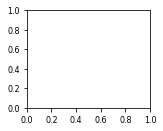

In [206]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

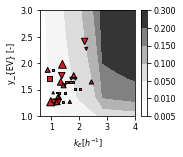

In [211]:
from numpy import ma
L = ma.masked_where(L <= 0, L)
from matplotlib import ticker, cm
lev_exp = np.arange(np.floor(np.log10(L.min())),
                    np.ceil(np.log10(L.max())))
levs = [0.005,0.01,0.05, 0.1, 0.15, 0.2, 0.3]
ax = plt.gca()
cs = ax.contourf(kEval, yEVval, L, levs, cmap=cm.Greys)
ax.scatter(df_ps_p.k_E, df_ps_p.y_EV, s=df_ps_p.Vcell*1e18, color='#e41a1c', edgecolor='k',marker='^', label="")
ax.scatter(df_ps_n.k_E, df_ps_n.y_EV, s=df_ps_n.Vcell*1e18, color='#e41a1c', edgecolor='k',marker='v', label="")
ax.scatter(df_ps_u.k_E, df_ps_u.y_EV, s=df_ps_u.Vcell*1e18, color='#e41a1c', edgecolor='k',marker='s', label="Isolates")
ax.set_xlim([0.6, 4])
ax.set_ylim([1.0, 3])
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["1","2", "3", "4"])
cbar = plt.colorbar(cs)
ax.set(xlabel=r"$k_E [h^{-1}]$", ylabel=r"y_{EV} [-]")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/protein_synthesis_contour.svg", format='svg')

In [156]:
kEiso

array([0.99075779, 2.24772861, 1.69596609, 1.08847819, 1.13266374,
       1.18755672, 1.80188288, 1.66242637, 1.77342271, 1.49693686,
       1.07106695, 1.08847819, 1.5523212 , 1.71324223, 1.49028861,
       1.86501058, 1.86158026, 1.19603821, 1.43095686, 1.28143903,
       1.23271808, 1.2163062 , 2.02109971, 1.37614597, 1.33948686,
       1.44120482, 1.06651747, 1.26213074, 2.1902445 , 2.43160947,
       0.98589388, 0.94506319, 1.08612411, 1.27493784, 1.06425717,
       1.01274099, 2.55341518, 1.39911616, 0.87580869])

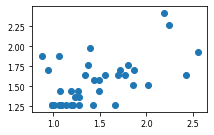

In [157]:
plt.scatter(kEiso, yEViso)

In [158]:
yEViso

array([1.26877628, 2.27098117, 1.64383562, 1.26877628, 1.26877628,
       1.26877628, 1.76235789, 1.26877628, 1.64383562, 1.4398745 ,
       1.4398745 , 1.26877628, 1.64383562, 1.7043362 , 1.58023989,
       1.7043362 , 1.51268153, 1.4398745 , 1.26877628, 1.35977337,
       1.35977337, 1.26877628, 1.51268153, 1.76235789, 1.64383562,
       1.58023989, 1.87267899, 1.4398745 , 2.41130031, 1.64383562,
       1.26877628, 1.7043362 , 1.26877628, 1.26877628, 1.26877628,
       1.26877628, 1.92559827, 1.97733195, 1.87267899])

In [ ]:
kMiso

In [112]:
df_low = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_bge_low.csv")
df_high = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_bge_high.csv")
#df_low['yields'] = df_low['yields'].apply(lambda x: np.log(x))
#df_low['rho'] = df_low['rho'].apply(lambda x: np.log(x))
#df_high['yields'] = df_high['yields'].apply(lambda x: np.log(x))
#df_high['rho'] = df_high['rho'].apply(lambda x: np.log(x))

In [117]:
np.median(df_high["KD"])

0.0033903609999999997

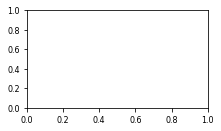

In [242]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

[Text(0, 0.5, 'Transporter density [-]'),
 Text(0.5, 0, 'Assimilation yield [-]')]

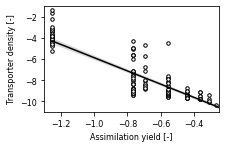

In [246]:
plt.scatter(df_low.yields,df_low.rho,s=12, marker='o', color='w', edgecolor='k')
ax = plt.gca()
#ax.set(yscale='log')
#ax.set(xscale='log')
ax.set_xlim([-1.3, -0.25])
ax.set_ylim([-11, -1])
ax = sns.regplot(x="yields", y="rho", data=df_low, marker="", line_kws={"color":"k","alpha":1.0,"lw":1.5}, order=1)
ax.set(xlabel="Assimilation yield [-]", ylabel="Transporter density [-]")

[Text(0, 0.5, 'Transporter density [-]'),
 Text(0.5, 0, 'Assimilation yield [-]')]

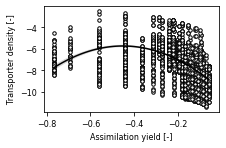

In [245]:
plt.scatter(df_high.yields,df_high.rho,s=12, marker='o', color='w', edgecolor='k')
ax = plt.gca()
#ax.set(yscale='log')
#ax.set(xscale='log')
#ax.set_xlim([-1.3, -0.25])
#ax.set_ylim([-11, -1])
ax = sns.regplot(x="yields", y="rho", data=df_high, marker="", line_kws={"color":"k","alpha":1.0,"lw":1.5}, order=2)
ax.set(xlabel="Assimilation yield [-]", ylabel="Transporter density [-]")

In [15]:
df_bge = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_bge_all.csv")
df_bge = df_bge.dropna()
df_bge["yields"] = df_bge['yield']

In [16]:
#
df_bge_p_sugars = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Sugars")]
df_bge_p_organics = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Organic acids")]
df_bge_p_aminos = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Amino acids")]
df_bge_p_fattys = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Fatty acids")]
df_bge_p_nucleos = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Nucleotides")]
df_bge_p_auxins = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Auxins")]
df_bge_n_sugars = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Sugars")]
df_bge_n_organics = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Organic acids")]
df_bge_n_aminos = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Amino acids")]
df_bge_n_fattys = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Fatty acids")]
df_bge_n_nucleos = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Nucleotides")]
df_bge_n_auxins = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Auxins")]
df_bge_u_sugars = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Sugars")]
df_bge_u_organics = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Organic acids")]
df_bge_u_aminos = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Amino acids")]
df_bge_u_fattys = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Fatty acids")]
df_bge_u_nucleos = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Nucleotides")]
df_bge_u_auxins = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Auxins")]
#
bge_grouped = df_bge.groupby(["response", "ontology"]).median()
df_bge_high = bge_grouped[bge_grouped.rgrowth >  0.055]
df_bge_low = bge_grouped[bge_grouped.rgrowth <  0.0407]

In [17]:
df_bge.loc[df_bge['rgrowth'] >= 0.055, 'growthregime'] = 'high' 
df_bge.loc[df_bge['rgrowth'] < 0.0407, 'growthregime'] = 'low' 

(0.0012, 0.0016)

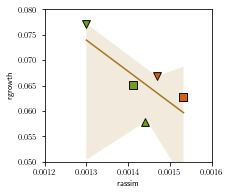

In [7]:
#plt.scatter(np.median(df_bge_p_sugars.rassim), np.median(df_bge_p_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_sugars.rassim), np.median(df_bge_n_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_sugars.rassim), np.median(df_bge_u_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_aminos.rassim), np.median(df_bge_p_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_aminos.rassim), np.median(df_bge_n_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_aminos.rassim), np.median(df_bge_u_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='s', label="")
#plt.scatter(np.median(df_bge_p_fattys.rassim), np.median(df_bge_p_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_fattys.rassim), np.median(df_bge_n_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_fattys.rassim), np.median(df_bge_u_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_organics.rassim), np.median(df_bge_p_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_organics.rassim), np.median(df_bge_n_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_organics.rassim), np.median(df_bge_u_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_nucleos.rassim), np.median(df_bge_p_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_nucleos.rassim), np.median(df_bge_n_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_nucleos.rassim), np.median(df_bge_u_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_auxins.rassim), np.median(df_bge_p_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_auxins.rassim), np.median(df_bge_n_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_auxins.rassim), np.median(df_bge_u_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
ax = plt.gca()
ax.set_ylim([5e-2, 8e-2])
ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5})
ax.set_xlim([1.2e-3, 1.6e-3])
#ax.set(yscale='log')
#ax.set(xscale='log')

[None]

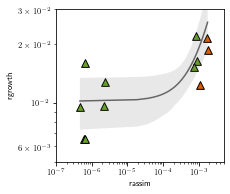

In [8]:
#plt.scatter(np.median(df_bge_p_sugars.rassim), np.median(df_bge_p_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_sugars.rassim), np.median(df_bge_n_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_sugars.rassim), np.median(df_bge_u_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_aminos.rassim), np.median(df_bge_p_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_aminos.rassim), np.median(df_bge_n_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_aminos.rassim), np.median(df_bge_u_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_fattys.rassim), np.median(df_bge_p_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_fattys.rassim), np.median(df_bge_n_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_fattys.rassim), np.median(df_bge_u_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_organics.rassim), np.median(df_bge_p_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_organics.rassim), np.median(df_bge_n_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_organics.rassim), np.median(df_bge_u_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_nucleos.rassim), np.median(df_bge_p_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_nucleos.rassim), np.median(df_bge_n_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_nucleos.rassim), np.median(df_bge_u_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_auxins.rassim), np.median(df_bge_p_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_auxins.rassim), np.median(df_bge_n_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_auxins.rassim), np.median(df_bge_u_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
ax = plt.gca()
ax.set_ylim([5e-3, 0.03])
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5}, order=1)
ax.set_xlim([1e-7, 5e-3])
ax.set(yscale='log')
ax.set(xscale='log')

[None]

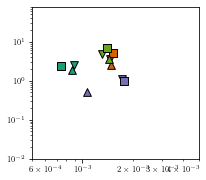

In [9]:
plt.scatter(np.median(df_bge_p_sugars.rassim), np.median(df_bge_p_sugars.Vmax/df_bge_p_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_sugars.rassim), np.median(df_bge_n_sugars.Vmax/df_bge_n_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_sugars.rassim), np.median(df_bge_u_sugars.Vmax/df_bge_u_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_aminos.rassim), np.median(df_bge_p_aminos.Vmax/df_bge_p_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_aminos.rassim), np.median(df_bge_n_aminos.Vmax/df_bge_n_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_aminos.rassim), np.median(df_bge_u_aminos.Vmax/df_bge_u_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_fattys.rassim), np.median(df_bge_p_fattys.Vmax/df_bge_p_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_fattys.rassim), np.median(df_bge_n_fattys.Vmax/df_bge_n_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_fattys.rassim), np.median(df_bge_u_fattys.Vmax/df_bge_u_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_organics.rassim), np.median(df_bge_p_organics.Vmax/df_bge_p_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_organics.rassim), np.median(df_bge_n_organics.Vmax/df_bge_n_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_organics.rassim), np.median(df_bge_u_organics.Vmax/df_bge_u_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_nucleos.rassim), np.median(df_bge_p_nucleos.Vmax/df_bge_p_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_nucleos.rassim), np.median(df_bge_n_nucleos.Vmax/df_bge_n_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_nucleos.rassim), np.median(df_bge_u_nucleos.Vmax/df_bge_u_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_auxins.rassim), np.median(df_bge_p_auxins.Vmax/df_bge_p_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_auxins.rassim), np.median(df_bge_n_auxins.Vmax/df_bge_n_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_auxins.rassim), np.median(df_bge_u_auxins.Vmax/df_bge_u_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
ax = plt.gca()
ax.set_ylim([1e-2, 8e1])
#ax = sns.regplot(x="rassim", y="KD", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5})
ax.set_xlim([5e-4, 5e-3])
ax.set(yscale='log')
ax.set(xscale='log')

[None]

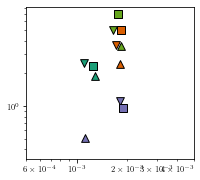

In [10]:
plt.scatter(np.median(df_bge_p_sugars.ruptake), np.median(df_bge_p_sugars.Vmax/df_bge_p_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_sugars.ruptake), np.median(df_bge_n_sugars.Vmax/df_bge_n_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_sugars.ruptake), np.median(df_bge_u_sugars.Vmax/df_bge_u_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_aminos.ruptake), np.median(df_bge_p_aminos.Vmax/df_bge_p_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_aminos.ruptake), np.median(df_bge_n_aminos.Vmax/df_bge_n_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_aminos.ruptake), np.median(df_bge_u_aminos.Vmax/df_bge_u_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_fattys.ruptake), np.median(df_bge_p_fattys.Vmax/df_bge_p_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_fattys.ruptake), np.median(df_bge_n_fattys.Vmax/df_bge_n_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_fattys.ruptake), np.median(df_bge_u_fattys.Vmax/df_bge_u_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_organics.ruptake), np.median(df_bge_p_organics.Vmax/df_bge_p_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_organics.ruptake), np.median(df_bge_n_organics.Vmax/df_bge_n_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_organics.ruptake), np.median(df_bge_u_organics.Vmax/df_bge_u_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_nucleos.ruptake), np.median(df_bge_p_nucleos.Vmax/df_bge_p_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_nucleos.ruptake), np.median(df_bge_n_nucleos.Vmax/df_bge_n_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_nucleos.ruptake), np.median(df_bge_u_nucleos.Vmax/df_bge_u_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_auxins.ruptake), np.median(df_bge_p_auxins.Vmax/df_bge_p_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_auxins.ruptake), np.median(df_bge_n_auxins.Vmax/df_bge_n_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_auxins.ruptake), np.median(df_bge_u_auxins.Vmax/df_bge_u_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
ax = plt.gca()
#ax.set_ylim([1e-2, 8e1])
#ax = sns.regplot(x="rassim", y="KD", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5})
ax.set_xlim([5e-4, 5e-3])
ax.set(yscale='log')
ax.set(xscale='log')

[None]

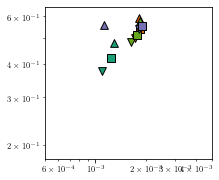

In [20]:
plt.scatter(np.median(df_bge_p_sugars.ruptake), np.median(df_bge_p_sugars.BGE), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_sugars.ruptake), np.median(df_bge_n_sugars.BGE), s=60, color='#d95f02', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_sugars.ruptake), np.median(df_bge_u_sugars.BGE), s=60, color='#d95f02', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_aminos.ruptake), np.median(df_bge_p_aminos.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_aminos.ruptake), np.median(df_bge_n_aminos.BGE), s=60, color='#66a61e', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_aminos.ruptake), np.median(df_bge_u_aminos.BGE), s=60, color='#66a61e', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_fattys.ruptake), np.median(df_bge_p_fattys.BGE), s=60, color='#7570b3', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_fattys.ruptake), np.median(df_bge_n_fattys.BGE), s=60, color='#7570b3', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_fattys.ruptake), np.median(df_bge_u_fattys.BGE), s=60, color='#7570b3', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_organics.ruptake), np.median(df_bge_p_organics.BGE), s=60, color='#1b9e77', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_organics.ruptake), np.median(df_bge_n_organics.BGE), s=60, color='#1b9e77', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_organics.ruptake), np.median(df_bge_u_organics.BGE), s=60, color='#1b9e77', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_nucleos.ruptake), np.median(df_bge_p_nucleos.BGE), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_nucleos.ruptake), np.median(df_bge_n_nucleos.BGE), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_nucleos.ruptake), np.median(df_bge_u_nucleos.BGE), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_auxins.ruptake), np.median(df_bge_p_auxins.BGE), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_auxins.ruptake), np.median(df_bge_n_auxins.BGE), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_auxins.ruptake), np.median(df_bge_u_auxins.BGE), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
ax = plt.gca()
#ax.set_ylim([1e-2, 8e1])
#ax = sns.regplot(x="rassim", y="KD", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5})
ax.set_xlim([5e-4, 5e-3])
ax.set(yscale='log')
ax.set(xscale='log')

[None]

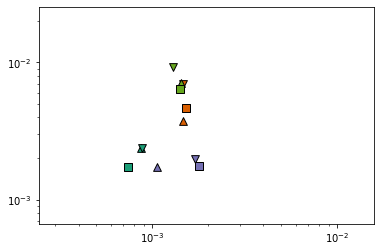

In [38]:
plt.scatter(np.median(df_bge_p_sugars.rassim), np.median(df_bge_p_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_sugars.rassim), np.median(df_bge_n_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_sugars.rassim), np.median(df_bge_u_sugars.KD), s=60, color='#d95f02', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_aminos.rassim), np.median(df_bge_p_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_aminos.rassim), np.median(df_bge_n_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_aminos.rassim), np.median(df_bge_u_aminos.KD), s=60, color='#66a61e', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_fattys.rassim), np.median(df_bge_p_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_fattys.rassim), np.median(df_bge_n_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_fattys.rassim), np.median(df_bge_u_fattys.KD), s=60, color='#7570b3', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_organics.rassim), np.median(df_bge_p_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_organics.rassim), np.median(df_bge_n_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='v', label="")
plt.scatter(np.median(df_bge_u_organics.rassim), np.median(df_bge_u_organics.KD), s=60, color='#1b9e77', edgecolor='k', marker='s', label="")
plt.scatter(np.median(df_bge_p_nucleos.rassim), np.median(df_bge_p_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_nucleos.rassim), np.median(df_bge_n_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_nucleos.rassim), np.median(df_bge_u_nucleos.KD), s=60, color='#e7298a', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_auxins.rassim), np.median(df_bge_p_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_auxins.rassim), np.median(df_bge_n_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_auxins.rassim), np.median(df_bge_u_auxins.KD), s=60, color='#e6ab02', edgecolor='k', marker='^', label="")
ax = plt.gca()
#ax.set_ylim([1e-2, 8e1])
#ax = sns.regplot(x="rassim", y="KD", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5})
#ax.set_xlim([5e-4, 5e-3])
ax.set(yscale='log')
ax.set(xscale='log')

[None]

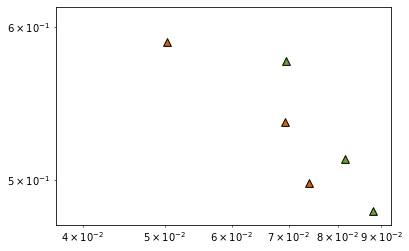

In [37]:
plt.scatter(np.median(df_bge_p_sugars.rdreserve), np.median(df_bge_p_sugars.BGE), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_sugars.rdreserve), np.median(df_bge_n_sugars.BGE), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_sugars.rdreserve), np.median(df_bge_u_sugars.BGE), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_aminos.rdreserve), np.median(df_bge_p_aminos.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_aminos.rdreserve), np.median(df_bge_n_aminos.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_aminos.rdreserve), np.median(df_bge_u_aminos.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_fattys.rdreserve), np.median(df_bge_p_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_fattys.rdreserve), np.median(df_bge_n_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_fattys.rdreserve), np.median(df_bge_u_fattys.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_organics.rdreserve), np.median(df_bge_p_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_organics.rdreserve), np.median(df_bge_n_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_organics.rdreserve), np.median(df_bge_u_organics.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_nucleos.rdreserve), np.median(df_bge_p_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_nucleos.rdreserve), np.median(df_bge_n_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_nucleos.rdreserve), np.median(df_bge_u_nucleos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_auxins.rdreserve), np.median(df_bge_p_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_auxins.rdreserve), np.median(df_bge_n_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_auxins.rdreserve), np.median(df_bge_u_auxins.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
ax = plt.gca()
#ax.set_ylim([5e-3, 0.03])
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
#ax = sns.regplot(x="rdreserve", y="BGE", data=df_bge_high, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5}, order=1)
#ax.set_xlim([1e-7, 5e-3])
ax.set(yscale='log')
ax.set(xscale='log')

[None]

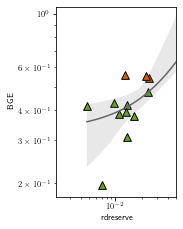

In [319]:
#plt.scatter(np.median(df_bge_p_sugars.rassim), np.median(df_bge_p_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_sugars.rassim), np.median(df_bge_n_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_sugars.rassim), np.median(df_bge_u_sugars.rgrowth), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_p_aminos.rassim), np.median(df_bge_p_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_n_aminos.rassim), np.median(df_bge_n_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
#plt.scatter(np.median(df_bge_u_aminos.rassim), np.median(df_bge_u_aminos.rgrowth), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_fattys.rdreserve), np.median(df_bge_p_fattys.BGE), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_fattys.rdreserve), np.median(df_bge_n_fattys.BGE), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_fattys.rdreserve), np.median(df_bge_u_fattys.BGE), s=60, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_organics.rdreserve), np.median(df_bge_p_organics.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_organics.rdreserve), np.median(df_bge_n_organics.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_organics.rdreserve), np.median(df_bge_u_organics.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_nucleos.rdreserve), np.median(df_bge_p_nucleos.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_nucleos.rdreserve), np.median(df_bge_n_nucleos.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_nucleos.rdreserve), np.median(df_bge_u_nucleos.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_auxins.rdreserve), np.median(df_bge_p_auxins.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_n_auxins.rdreserve), np.median(df_bge_n_auxins.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_u_auxins.rdreserve), np.median(df_bge_u_auxins.BGE), s=60, color='#66a61e', edgecolor='k', marker='^', label="")
ax = plt.gca()
#ax.set_ylim([5e-3, 0.03])
#ax = sns.regplot(x="rassim", y="rgrowth", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":1.5})
ax = sns.regplot(x="rdreserve", y="BGE", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":1.5}, order=1)
#ax.set_xlim([1e-7, 5e-3])
ax.set(yscale='log')
ax.set(xscale='log')

In [340]:
fig_height = 1.95                       # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_height*golden_mean      # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 8,
          'axes.titlesize': 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size}

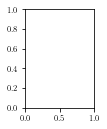

In [341]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

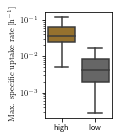

In [345]:
ax = plt.gca()
#ax = sns.stripplot(x="growthregime", y="Vmax", palette =["#a6761d", '#666666'], data=df_bge, dodge=True, size=3)
ax = sns.boxplot(x="growthregime", y="Vmax", data=df_bge, palette =["#a6761d", '#666666'], showfliers=False)
ax.set(yscale="log")
ax.set(ylabel=r'$\textnormal{Max. specific uptake rate}\, [\mathrm{h^{-1}}]$', xlabel='')
#ax.set_yticks([10,100])
#ax.set_yticklabels(["10","100"])
#ax.set_ylim([-3, 40])
#plt.title("Amino acids")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/batch_Vmax.svg", format="svg")

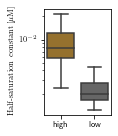

In [344]:
ax = plt.gca()
#ax = sns.stripplot(x="growthregime", y="Vmax", palette =["#a6761d", '#666666'], data=df_bge, dodge=True, size=3)
ax = sns.boxplot(x="growthregime", y="KD", data=df_bge, palette =["#a6761d", '#666666'], showfliers=False)
ax.set(yscale="log")
ax.set(ylabel=r'$\textnormal{Half-saturation constant}\, [\mathrm{\mu M}]$', xlabel='')
#ax.set_yticks([10,100])
#ax.set_yticklabels(["10","100"])
#ax.set_ylim([-3, 40])
#plt.title("Amino acids")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/batch_KD.svg", format="svg")

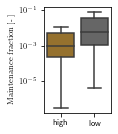

In [350]:
ax = plt.gca()
#ax = sns.stripplot(x="growthregime", y="Vmax", palette =["#a6761d", '#666666'], data=df_bge, dodge=True, size=3)
ax = sns.boxplot(x="growthregime", y="rmaint", data=df_bge, palette =["#a6761d", '#666666'], showfliers=False)
ax.set(yscale="log")
ax.set(ylabel=r'$\textnormal{Maintenance fraction}\, [\,\textnormal{-}\,]$', xlabel='')
#ax.set_yticks([10,100])
#ax.set_yticklabels(["10","100"])
#ax.set_ylim([-3, 40])
#plt.title("Amino acids")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/batch_jM.svg", format="svg")

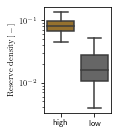

In [351]:
ax = plt.gca()
#ax = sns.stripplot(x="growthregime", y="Vmax", palette =["#a6761d", '#666666'], data=df_bge, dodge=True, size=3)
ax = sns.boxplot(x="growthregime", y="rdreserve", data=df_bge, palette =["#a6761d", '#666666'], showfliers=False)
ax.set(yscale="log")
ax.set(ylabel=r'$\textnormal{Reserve density}\, [\,\mathnormal{-}\,]$', xlabel='')
#ax.set_yticks([10,100])
#ax.set_yticklabels(["10","100"])
#ax.set_ylim([-3, 40])
#plt.title("Amino acids")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/batch_mE.svg", format="svg")

[Text(0, 0.5, 'Gene copy number normalized [-]'), Text(0.5, 0, '')]

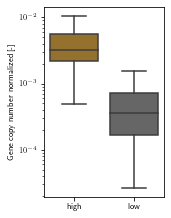

In [320]:
ax = plt.gca()
#ax = sns.stripplot(x="growthregime", y="Vmax", palette =["#a6761d", '#666666'], data=df_bge, dodge=True, size=3)
ax = sns.boxplot(x="growthregime", y="rho", data=df_bge, palette =["#a6761d", '#666666'], showfliers=False)
ax.set(yscale="log")
ax.set(ylabel='Gene copy number normalized [-]', xlabel='')
#ax.set_yticks([10,100])
#ax.set_yticklabels(["10","100"])
#ax.set_ylim([-3, 40])
#plt.title("Amino acids")
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/plots/isolates_z_aminos.svg", format="svg")

In [356]:
from scipy import stats

In [364]:
df_bge_high = df_bge.loc[(df_bge.growthregime == "high")]
df_bge_low = df_bge.loc[(df_bge.growthregime == "low")]

In [378]:
stats.kruskal(df_bge_high["KD"], df_bge_low["KD"])

KruskalResult(statistic=1608.758650583947, pvalue=0.0)

In [367]:
df_bge_low

,BGE,BP,BR,rgrowth,renzyme,rmaint,rassim,rdreserve,isolate,class,...,monomer,ontology,rho,Vmax,KD,yield,kE,yEV,aX,growthregime
26,0.397854,4.311898e-09,5.285441e-09,0.036587,0.000107,0.000322,9.057918e-04,0.066730,Nocardioides sp. URHA0020,Actinobacteria,...,2-aminoisobutyric acid,Amino acids,0.002058,0.026981,0.003817,0.250000,1.066517,1.872679,0.002924,low
34,0.569965,2.724649e-09,1.671878e-09,0.024697,0.000101,0.000057,1.338361e-03,0.030265,Sphingomonas sp. URHD0007,Alphaproteobacteria,...,2-aminoisobutyric acid,Amino acids,0.001045,0.011795,0.001701,0.250000,1.064257,1.268776,0.004073,low
35,0.581052,4.180042e-09,1.985085e-09,0.035936,0.000074,0.000027,1.348910e-03,0.046774,Sphingomonas sp. URHD0057,Alphaproteobacteria,...,2-aminoisobutyric acid,Amino acids,0.001565,0.017718,0.001956,0.250000,1.012741,1.268776,0.002056,low
38,0.398918,4.092622e-09,5.388464e-09,0.035526,0.000075,0.005231,8.743106e-04,0.079536,Variovorax sp. URHB0020,Betaproteobacteria,...,2-aminoisobutyric acid,Amino acids,0.002416,0.025917,0.006716,0.250000,0.875809,1.872679,0.002103,low
41,0.255921,1.623215e-10,5.309174e-10,0.005186,0.000012,0.006616,1.951685e-07,0.005067,Blastococcus sp. URHD0036,Actinobacteria,...,"2,3-Dihydroxybenzoic acid",Organic acids,0.000097,0.001236,0.001379,0.164615,1.695966,1.643836,0.002309,low
42,0.629663,2.291427e-09,1.322630e-09,0.022736,0.000033,0.037469,1.550452e-03,0.027330,Bradyrhizobium sp. URHA0002,Alphaproteobacteria,...,"2,3-Dihydroxybenzoic acid",Organic acids,0.000488,0.005193,0.002653,0.164615,1.088478,1.268776,0.001464,low
43,0.622993,2.010547e-09,1.197374e-09,0.020320,0.000039,0.052081,1.468137e-03,0.023492,Bradyrhizobium sp. URHA0013,Alphaproteobacteria,...,"2,3-Dihydroxybenzoic acid",Organic acids,0.000437,0.004634,0.002567,0.164615,1.132664,1.268776,0.001904,low
44,0.628954,2.232295e-09,1.285241e-09,0.022143,0.000037,0.031964,1.566766e-03,0.024316,Bradyrhizobium sp. URHD0069,Alphaproteobacteria,...,"2,3-Dihydroxybenzoic acid",Organic acids,0.000477,0.005065,0.002560,0.164615,1.187557,1.268776,0.001686,low
45,0.440959,2.288940e-09,2.878688e-09,0.023352,0.000042,0.017931,1.115969e-03,0.023364,Burkholderia sp. URHA0054,Betaproteobacteria,...,"2,3-Dihydroxybenzoic acid",Organic acids,0.000706,0.007281,0.003432,0.164615,1.801883,1.762358,0.001787,low
46,0.639050,3.382140e-09,1.809315e-09,0.031758,0.000230,0.005811,1.808794e-03,0.024920,Caulobacter sp. URHA0033,Alphaproteobacteria,...,"2,3-Dihydroxybenzoic acid",Organic acids,0.000702,0.007439,0.002692,0.164615,1.662426,1.268776,0.007238,low
